<a href="https://colab.research.google.com/github/maicken/INF442_P8/blob/master/INF442_P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting data and saving them at my Google Drive folder

In [0]:
# web scraping

!pip install selenium
!pip install beautifulsoup4
!pip install wget

from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import requests
import wget
import traceback

     |████████████████████████████████| 911kB 7.9MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=81cba61bf635e2cb329f8d77e60a61431ccdc0eb0fb62218056580a2017ec1d2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
url = 'https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/#_'

year = 2010 # First year

response = requests.get(url, timeout=10)
if response.status_code == 200:
  print('Permission to access granted')
  print()
soup = BeautifulSoup(response.content, 'html.parser')
# get list of names
list_names = []
# Selecting all article type
for file in soup.findAll('article', attrs={'class':'card resource-card '}):
  # Get the name of the file
  name = file.findAll('h4', attrs={'class':'ellipsis'})[0].get_text()
  # Check if its a file
  if name.endswith('.csv') and int(name[-8:-4]) >= year:
    # Get the file
    list_names.append(name)
    filename = file.findAll('a', attrs={'class':'btn btn-sm btn-primary'})[1]['href']
    filedata = wget.download(filename, 'sample_data/' + name)

Permission to access granted



In [0]:
v = []
u = []
l = []
c = []

def sort_names(name):
  return(name[:-10]+name[-8:])
list_names_s = sorted(list_names, key=sort_names)

n = len(list_names_s) / 4
for i, name in enumerate(list_names_s, 0):
  if 0 <= i < n:
    c.append(name)
  elif n <= i < 2*n:
    l.append(name)
  elif 2*n <= i < 3*n:
    u.append(name)
  else:
    v.append(name)

df_c = pd.DataFrame()
df_l = pd.DataFrame()
df_u = pd.DataFrame()
df_v = pd.DataFrame()

print("--------------------")
print("caracteristiques.csv")
print("--------------------")
er = []
for file in c:
    try:
      data = pd.read_csv('sample_data/' + file, index_col='Num_Acc', engine='python')
      df_c = pd.concat([data, df_c], axis=0, sort=False)
    except Exception as e:
      traceback.print_exc()
      er.append(file[-8:-4])
    print()
    print("size = %d" %len(df_c))
    print("num_columns = %d" %len(df_c.columns))
print()
print('Error in years :')
print(er)
print()
print("--------------------")
print("lieux.csv")
print("--------------------")
er = []
for file in l:
    try:
      data = pd.read_csv('sample_data/' + file, index_col='Num_Acc', engine='python')
      df_l = pd.concat([data, df_l], axis=0, sort=False)
    except Exception as e:
      traceback.print_exc()
      er.append(file[-8:-4])
    print()
    print("size = %d" %len(df_l))
    print("num_columns = %d" %len(df_l.columns))
print()
print('Error in years :')
print(er)
print()
print("--------------------")
print("usagers.csv")
print("--------------------")
er = []
for file in u:
    try:
      data = pd.read_csv('sample_data/' + file, index_col='Num_Acc', engine='python')
      df_u = pd.concat([data, df_u], axis=0, sort=False)
    except Exception as e:
      traceback.print_exc()
      er.append(file[-8:-4])
    print()
    print("size = %d" %len(df_u))
    print("num_columns = %d" %len(df_u.columns))
print()
print('Error in years :')
print(er)
print()
print("--------------------")
print("vehicules.csv")
print("--------------------")
er = []
for file in v:
    try:
      data = pd.read_csv('sample_data/' + file, index_col='Num_Acc', engine='python')
      df_v = pd.concat([data, df_v], axis=0, sort=False)
    except Exception as e:
      traceback.print_exc()
      er.append(file[-8:-4])
    print()
    print("size = %d" %len(df_v))
    print("num_columns = %d" %len(df_v.columns))
print()
print('Error in years :')
print(er)
print()
df_c.to_csv('sample_data/caracteristiques.csv')
df_l.to_csv('sample_data/lieux.csv')
df_u.to_csv('sample_data/usagers.csv')
df_v.to_csv('sample_data/vehicules.csv')

--------------------
caracteristiques.csv
--------------------

size = 69379
num_columns = 15

size = 136353
num_columns = 15

size = 198603
num_columns = 15

size = 257000
num_columns = 15

size = 316854
num_columns = 15

size = 375508
num_columns = 15

size = 434940
num_columns = 15

size = 495641
num_columns = 15

size = 553424
num_columns = 15

Error in years :
[]

--------------------
lieux.csv
--------------------

size = 69379
num_columns = 17

size = 136353
num_columns = 17

size = 198603
num_columns = 17

size = 257000
num_columns = 17

size = 316854
num_columns = 17

size = 375508
num_columns = 17

size = 434940
num_columns = 17

size = 495641
num_columns = 17

size = 553424
num_columns = 17

Error in years :
[]

--------------------
usagers.csv
--------------------

size = 154192
num_columns = 11

size = 302735
num_columns = 11

size = 441363
num_columns = 11

size = 570057
num_columns = 11

size = 702243
num_columns = 11

size = 832621
num_columns = 11

size = 966043
num_co

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Pass data to my google drive
%mv "sample_data/lieux.csv" "drive/My Drive/Colab Notebooks/INF442_P8/lieux.csv"
%mv "sample_data/caracteristiques.csv" "drive/My Drive/Colab Notebooks/INF442_P8/caracteristiques.csv"
%mv "sample_data/usagers.csv" "drive/My Drive/Colab Notebooks/INF442_P8/usagers.csv"
%mv "sample_data/vehicules.csv" "drive/My Drive/Colab Notebooks/INF442_P8/vehicules.csv"

%cd "drive/My Drive/Colab Notebooks/INF442_P8/"

/content/drive/My Drive/Colab Notebooks/INF442_P8


# Data cleaning

Now that we have all the .csv that will be using, we clean those data and join them together

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [0]:
# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Getting the data
%cd "gdrive/My Drive/Colab Notebooks/INF442_P8"

/content/gdrive/My Drive/Colab Notebooks/INF442_P8


In [0]:
df_c = pd.read_csv('caracteristiques.csv')
df_l = pd.read_csv('lieux.csv')
df_u = pd.read_csv('usagers.csv')
df_v = pd.read_csv('vehicules.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print("Caracteristiques")
print(df_c.head())
print(df_c.columns)
print()
print("Lieux")
print(df_l.head())
print(df_l.columns)
print()
print("Usagers")
print(df_u.head())
print(df_u.columns)
print()
print("Vehicules")
print(df_v.head())
print(df_v.columns)

Caracteristiques
        Num_Acc  an  mois  jour  ...  gps        lat      long  dep
0  201800000001  18     1    24  ...    M  5055737.0  294992.0  590
1  201800000002  18     2    12  ...    M  5052936.0  293151.0  590
2  201800000003  18     3     4  ...    M  5051243.0  291714.0  590
3  201800000004  18     5     5  ...    M  5051974.0  289123.0  590
4  201800000005  18     6    26  ...    M  5051607.0  290605.0  590

[5 rows x 16 columns]
Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

Lieux
        Num_Acc  catr voie  v1   v2  ...  larrout  surf  infra  situ  env1
0  201800000001     3   41 NaN    C  ...      NaN   1.0    0.0   1.0   0.0
1  201800000002     4   41 NaN    D  ...      NaN   1.0    0.0   1.0   0.0
2  201800000003     3   39 NaN    D  ...      NaN   1.0    0.0   1.0   0.0
3  201800000004     3   39 NaN  NaN  ...      NaN   1.0    0.0   1.0   0.0
4  20180000000

In [0]:
# Information about the columns
print("caracteristiques")
print()
df_c.info()
print()
print("lieux")
print()
df_l.info()
print()
print("usagers")
print()
df_u.info()
print()
print("vehicules")
print()
df_v.info()
print()

caracteristiques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553424 entries, 0 to 553423
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  553424 non-null  int64  
 1   an       553424 non-null  int64  
 2   mois     553424 non-null  int64  
 3   jour     553424 non-null  int64  
 4   hrmn     553424 non-null  int64  
 5   lum      553424 non-null  int64  
 6   agg      553424 non-null  int64  
 7   int      553424 non-null  int64  
 8   atm      553358 non-null  float64
 9   col      553405 non-null  float64
 10  com      553424 non-null  int64  
 11  adr      482138 non-null  object 
 12  gps      349704 non-null  object 
 13  lat      341505 non-null  float64
 14  long     341501 non-null  float64
 15  dep      553424 non-null  int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 67.6+ MB

lieux

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553424 entries, 0 to 553423
Data columns (total

In [0]:
# Some histogramas to analyse caracteristiques
print()
print(df_c['dep'].value_counts())
print()
print(df_c['com'].value_counts())
print()
print(df_c['agg'].value_counts())
print()
print(df_c['int'].value_counts())
print()
print(df_c['atm'].value_counts())
print()
print(df_c['col'].value_counts())
print()
print(df_c['gps'].value_counts())


750    58834
130    35762
930    25492
920    23641
940    22648
       ...  
460      854
90       829
150      786
480      587
230      562
Name: dep, Length: 101, dtype: int64

55     23081
88      6919
113     6743
116     6633
7       6543
       ...  
879        1
840        1
881        1
772        1
845        1
Name: com, Length: 901, dtype: int64

2    371614
1    181810
Name: agg, dtype: int64

1    386176
2     66733
3     50705
6     17171
9      9349
4      9104
5      7105
7      6325
8       666
0        90
Name: int, dtype: int64

1.0    446181
2.0     58692
8.0     17569
3.0     12476
7.0      6489
5.0      3702
9.0      3672
4.0      3241
6.0      1336
Name: atm, dtype: int64

6.0    187189
3.0    154642
2.0     67015
7.0     55425
1.0     52682
4.0     18630
5.0     17822
Name: col, dtype: int64

M    336961
A      5127
R      4027
G      2743
Y       842
T         2
S         2
Name: gps, dtype: int64


In [0]:
# Some histogramas to analyse lieux
print()
print(df_l['catr'].value_counts())
print()
print(df_l['circ'].value_counts())
print()
print(df_l['nbv'].value_counts())
print()
print(df_l['vosp'].value_counts())
print()
print(df_l['prof'].value_counts())
print()
print(df_l['plan'].value_counts())
print()
print(df_l['surf'].value_counts())
print()
print(df_l['infra'].value_counts())
print()
print(df_l['situ'].value_counts())
print()
print(df_l['env1'].value_counts())


4    275408
3    184584
1     45562
2     35705
9      7077
6      3759
5       935
7       394
Name: catr, dtype: int64

2.0    340973
1.0    102585
3.0     74068
0.0     31271
4.0      3014
Name: circ, dtype: int64

2.0     308897
1.0      69788
0.0      59199
4.0      51607
3.0      42853
6.0      10257
5.0       5553
8.0       1954
7.0        643
10.0       316
9.0        166
11.0        51
12.0        37
13.0        14
Name: nbv, dtype: int64

0.0    515659
3.0     15770
1.0     12008
2.0      7484
Name: vosp, dtype: int64

1.0    419690
2.0     78928
0.0     36394
3.0      9617
4.0      6925
Name: prof, dtype: int64

1.0    417357
2.0     45182
0.0     41346
3.0     40583
4.0      6750
Name: plan, dtype: int64

1.0    427628
2.0     95148
0.0     18391
7.0      3174
9.0      2797
5.0      1589
8.0      1243
3.0       936
4.0       354
6.0       308
Name: surf, dtype: int64

0.0    488629
5.0     31064
3.0      8601
2.0      7976
1.0      5402
6.0      4104
4.0      2067
7.0     

In [0]:
# Join caracteristiques and lieux into one pandas only
df = df_c.merge(df_l, left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553424 entries, 0 to 553423
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Num_Acc_x  553424 non-null  int64  
 1   an         553424 non-null  int64  
 2   mois       553424 non-null  int64  
 3   jour       553424 non-null  int64  
 4   hrmn       553424 non-null  int64  
 5   lum        553424 non-null  int64  
 6   agg        553424 non-null  int64  
 7   int        553424 non-null  int64  
 8   atm        553358 non-null  float64
 9   col        553405 non-null  float64
 10  com        553424 non-null  int64  
 11  adr        482138 non-null  object 
 12  gps        349704 non-null  object 
 13  lat        341505 non-null  float64
 14  long       341501 non-null  float64
 15  dep        553424 non-null  int64  
 16  Num_Acc_y  553424 non-null  int64  
 17  catr       553424 non-null  int64  
 18  voie       484820 non-null  object 
 19  v1         2674 non-nul

In [0]:
# Some histogramas to analyse vehicules
print()
print(df_v['senc'].value_counts())
print()
print(df_v['catv'].value_counts())
print()
print(df_v['obs'].value_counts())
print()
print(df_v['obsm'].value_counts())
print()
print(df_v['choc'].value_counts())
print()
print(df_v['manv'].value_counts())
print()


0.0    681840
1.0    159382
2.0    100728
Name: senc, dtype: int64

7     583688
33     77985
10     51847
1      42174
30     40481
2      37307
31     22369
32     21881
34     13542
14      9269
15      8560
37      7163
17      6641
3       3911
13      3632
99      3586
21      1886
38      1871
40      1300
36      1288
20       912
16       400
35       273
39       256
Name: catv, dtype: int64

0.0     819484
1.0      19908
13.0     15165
2.0      13324
4.0      11350
3.0      10419
6.0      10073
8.0       9771
14.0      6660
16.0      5593
12.0      5388
15.0      4523
9.0       3184
11.0      2187
7.0       2122
5.0       1287
10.0      1041
Name: obs, dtype: int64

2.0    635926
0.0    188814
1.0    101842
9.0     11456
6.0      1824
4.0       907
5.0       800
Name: obsm, dtype: int64

1.0    341632
3.0    133996
2.0    108755
4.0     92190
8.0     68541
0.0     64697
7.0     59018
6.0     32166
5.0     25531
9.0     15347
Name: choc, dtype: int64

1.0     402692
2.0     

In [0]:
# Some histogramas to analyse usagers
print()
print(df_u['place'].value_counts())
print()
print(df_u['catu'].value_counts())
print()
print(df_u['grav'].value_counts())
print()
print(df_u['sexe'].value_counts())
print()
print(df_u['an_nais'].value_counts())
print()
print(df_u['trajet'].value_counts())
print()
print(df_u['secu'].value_counts())
print()
print(df_u['locp'].value_counts())
print()
print(df_u['actp'].value_counts())
print()
print(df_u['etatp'].value_counts())
print()


1.0    917361
2.0    128505
3.0     28353
4.0     24023
5.0     12418
7.0      3654
8.0      3640
9.0      3546
6.0      1237
Name: place, dtype: int64

1    917305
2    205432
3    107376
4      2120
Name: catu, dtype: int64

1    504629
4    442501
3    251731
2     33372
Name: grav, dtype: int64

1    831047
2    401186
Name: sexe, dtype: int64

1990.0    33560
1991.0    33005
1992.0    32383
1989.0    31776
1988.0    31259
          ...  
1912.0        5
1909.0        2
1908.0        2
1907.0        2
1906.0        2
Name: an_nais, Length: 114, dtype: int64

5.0    470736
0.0    324453
1.0    168745
4.0    119589
9.0     87166
3.0     33321
2.0     27826
Name: trajet, dtype: int64

11.0    700522
21.0    223718
13.0     91236
93.0     74863
23.0     22173
12.0     18600
22.0     13008
31.0      8774
3.0       7691
92.0      4931
91.0      4806
1.0       2729
2.0       2588
41.0      1703
42.0      1390
43.0      1091
33.0       464
32.0       419
Name: secu, dtype: int64

0.0    1

In [0]:
# Clean data and make all together

df_c_clean = df_c[['Num_Acc', 'an', 'lum', 'dep', 'agg', 'int', 'atm', 'col']].copy()
df_l_clean = df_l[['Num_Acc', 'catr', 'circ', 'nbv', 'vosp', 'plan', 'surf',
                   'infra', 'situ']].copy()
df_v_clean = df_v[['Num_Acc', 'num_veh', 'catv', 'obs', 'obsm', 'choc',
                   'manv']].copy()
df_total = df_u[['Num_Acc', 'num_veh','place', 'catu', 'grav', 'an_nais', 
                 'trajet', 'secu', 'locp', 'actp', 'etatp']].copy()

In [0]:
# we first join 'lieux' and 'caracteristiques' to 'usagers:
df_total = df_total.join(df_c_clean.set_index('Num_Acc'), on='Num_Acc')
df_total = df_total.join(df_l_clean.set_index('Num_Acc'), on='Num_Acc')

In [0]:
# Joining some informations together
# We use a temporary column to merge the informations from usagers
# and from vehicles
df_total.insert(1, 'temp', 'not determined')
df_v_clean.insert(1, 'temp', 'not determined')

# Vehicles
# simplify catv
sim = [[30,31,32,33,34], [7,10], [13, 14, 15, 16, 17, 20, 21, 37], [35, 36, 38, 39, 40, 99]]
clas = [2, 3, 4, 5]
for i in range(len(clas)):
  for j in sim[i]:
      df_v_clean = df_v_clean.replace({'catv': {j : clas[i]}})
print(df_v_clean['catv'].value_counts())  

3    639446
2    213565
1     42174
4     38463
5      8574
Name: catv, dtype: int64


In [0]:
# join together obs and obsm
for i in range(len(df_v_clean.index)):
  
  df_v_clean.at[i, 'temp'] = str(df_v_clean.at[i, 'Num_Acc']) + str(df_v_clean.at[i, 'num_veh'])

  if df_v_clean.at[i, 'obsm'] != 0:
    df_v_clean.at[i, 'obs'] = df_v_clean.at[i, 'obsm']
  else:
    if df_v_clean.at[i, 'obs'] != 0:
      df_v_clean.at[i, 'obs'] = 7 # fixed object
  
del df_v_clean['obsm']

# Usagers
# transforming an-nais in age
for i in range(len(df_total.index)):

  df_total.at[i, 'temp'] = str(df_total.at[i, 'Num_Acc']) + str(df_total.at[i, 'num_veh'])

  year = df_total.at[i, 'Num_Acc']
  year = int(str(year)[0:4])
  
  if not math.isnan(df_total.at[i, 'an_nais']):
    df_total.at[i, 'an_nais'] = int(year - df_total.at[i, 'an_nais'])

# Renames the column:
df_total.rename(columns={'an_nais' : 'age'}, inplace=True)

In [0]:
# Erase Num_acc and num_veh to make the join

del df_total['Num_Acc']
del df_total['num_veh']
del df_v_clean['Num_Acc']
del df_v_clean['num_veh']

df_total = df_total.join(df_v_clean.set_index('temp'), on='temp', how='left')

In [0]:
# Now we come back with number of accident and number of the vehicle

df_total.insert(0, 'num_acc', 0)
df_total.insert(1, 'num_veh', 'not determined')

for i in range(len(df_total.index)):
  value = df_total.at[i, 'temp']
  v_len = len(value)
  num_s = value[0 : v_len - 3]

  num = int(num_s)
  veh = value[v_len - 3 : v_len]

  df_total.at[i, 'num_acc'] = num
  df_total.at[i, 'num_veh'] = veh

In [0]:
# Delete the temp column

del df_total['temp']

In [0]:
# Transform NaN to means and etc

columns = list(df_total)
means = {'nbv'}
majority = {'place', 'trajet', 'agg', 'circ', 
            'vosp', 'plan', 'surf', 'infra', 'situ', 'atm', 'col', 'atm'}
zeros = {'locp', 'actp', 'etatp', 'obs', 'choc', 'manv'}

for column in columns:
  if column in means:
    df_total[column].fillna(value=df_total[column].mean(), inplace=True)
  if column in majority:
    df_total[column].fillna(value=df_total[column].value_counts().idxmax(), 
                            inplace=True)
  if column in zeros:
    df_total[column].fillna(value=0, inplace=True)
  if column == 'secu':
    df_total[column].fillna(value=3,inplace=True)
if column == 'age':
    df_total[column].fillna(-1, inplace=True)

df_total['age'].replace(to_replace=[-1], value=np.nan, inplace=True)
df_total['age'].fillna(df_total['age'].mean(), inplace=True)

In [0]:
# To analyse only one departement, uncomment this:
# departament = 750 # for paris
# df_total = df_total[df_total.dep == departament]
# del df_total['dep']

In [0]:
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232233 entries, 0 to 1232232
Data columns (total 30 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   num_acc  1232233 non-null  int64  
 1   num_veh  1232233 non-null  object 
 2   place    1232233 non-null  float64
 3   catu     1232233 non-null  int64  
 4   grav     1232233 non-null  int64  
 5   age      1232233 non-null  float64
 6   trajet   1232233 non-null  float64
 7   secu     1232233 non-null  float64
 8   locp     1232233 non-null  float64
 9   actp     1232233 non-null  float64
 10  etatp    1232233 non-null  float64
 11  an       1232233 non-null  int64  
 12  lum      1232233 non-null  int64  
 13  dep      1232233 non-null  int64  
 14  agg      1232233 non-null  int64  
 15  int      1232233 non-null  int64  
 16  atm      1232233 non-null  float64
 17  col      1232233 non-null  float64
 18  catr     1232233 non-null  int64  
 19  circ     1232233 non-null  float64
 20  nb

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0


In [0]:
df_total.to_csv('dataframe.csv', index=False)

# Data analysis
From the clean data, we will be performing some analysis seeking to find an insight and thus be able to give a suggestion to reduce the number of accidents



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Getting the dataframe that we will use to analyse
%cd "gdrive/My Drive/Colab Notebooks/INF442_P8"

/content/gdrive/My Drive/Colab Notebooks/INF442_P8


In [0]:
df = pd.read_csv('dataframe.csv', index_col=0)
df.info()
df.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232233 entries, 201800000001 to 201000069386
Data columns (total 30 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   num_veh  1232233 non-null  object 
 1   place    1232233 non-null  float64
 2   catu     1232233 non-null  int64  
 3   grav     1232233 non-null  int64  
 4   age      1232233 non-null  float64
 5   trajet   1232233 non-null  float64
 6   secu     1232233 non-null  float64
 7   locp     1232233 non-null  float64
 8   actp     1232233 non-null  float64
 9   etatp    1232233 non-null  float64
 10  an       1232233 non-null  int64  
 11  hrmn     1232233 non-null  int64  
 12  lum      1232233 non-null  int64  
 13  dep      1232233 non-null  int64  
 14  agg      1232233 non-null  int64  
 15  int      1232233 non-null  int64  
 16  atm      1232233 non-null  float64
 17  col      1232233 non-null  float64
 18  catr     1232233 non-null  int64  
 19  circ     1232233 non-null 

,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,hrmn,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv
num_acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1505,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0
201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1505,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0
201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1015,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1015,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1135,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0


In [0]:
# Columns that we will be using
df_gravity = df.drop(['num_veh', "hrmn", "dep", "an", "locp", "actp", "int", "etatp", "place", "surf", "vosp", "plan", "situ", "infra", "atm", "secu", "lum", "manv"], axis=1)
df_gravity.info()
df_gravity = df_gravity[(df_gravity.choc != 0) & (df_gravity.trajet != 0) & (df_gravity.obs != 0) & (df_gravity.circ != 0) ]
y = df_gravity['grav'].to_numpy()
df_gravity = df_gravity.drop(['grav'], axis=1)
print('Before dummification we have {} variables in train'.format(len(df_gravity.columns)))
df_gravity = pd.get_dummies(df_gravity, columns=["catv", "choc", "col", "obs", "trajet", "catr", "catu", "circ", "agg"])
print('After dummification we have {} variables in train'.format(len(df_gravity.columns)))
df_gravity['age'] = df_gravity['age'] / df_gravity['age'].max()
df_gravity['nbv'] = df_gravity['nbv'] / df_gravity['nbv'].max()

X = df_gravity

# Correct gravity order
# 1 - Uninjured 
# 2 - Minor injury 
# 3 - Hospitalized Injury 
# 4 - Death

df_gravity.replace({'grav': {2: -1}})
df_gravity.replace({'grav': {4: 2}})
df_gravity.replace({'grav': {-1: 4}})

df_gravity.info()
print(df_gravity.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232233 entries, 201800000001 to 201000069386
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   catu    1232233 non-null  int64  
 1   grav    1232233 non-null  int64  
 2   age     1232233 non-null  float64
 3   trajet  1232233 non-null  float64
 4   agg     1232233 non-null  int64  
 5   col     1232233 non-null  float64
 6   catr    1232233 non-null  int64  
 7   circ    1232233 non-null  float64
 8   nbv     1232233 non-null  float64
 9   catv    1232233 non-null  int64  
 10  obs     1232233 non-null  float64
 11  choc    1232233 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 122.2 MB
Before dummification we have 11 variables in train
After dummification we have 54 variables in train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 770254 entries, 201800000001 to 201000069386
Data columns (total 54 columns):
 #   Column      Non-Null Count   Dtype  
--

In [0]:
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     9616.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        14:59:41   Log-Likelihood:            -1.9535e+06
No. Observations:              770254   AIC:                         3.907e+06
Df Residuals:                  770208   BIC:                         3.908e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.1734      0.022     53.487      0.000       1.130       1.216
nbv           -1.2411      0.041    -30.285      0.000      -1.321      -1.161
catv_1         2.8223      0.018    155.353      0.000       2.787       2.858
catv_2         2.7382      0.012    234.756      0.000       2.715       2.761
catv_3        -0.3267      0.010    -32.548      0.000      -0.346      -0.307
catv_4        -0.8702      0.017    -50.307      0.000      -0.904      -0.836
catv_5        -0.2752      0.029     -9.418      0.000      -0.332      -0.218
choc_1.0       0.6172      0.008     80.217      0.000       0.602       0.632
choc_2.0       0.2019      0.010     19.689      0.000       0.182       0.222
choc_3.0       0.2971      0.010     29.993      0.000       0.278       0.316
choc_4.0       0.7295      0.013     55.127      0.000       0.704       0.755
choc_5.0      -0.0434      0.020     -2.193      0.028      -0.082      -0.005
choc_6.0      -0.0097      0.018     -0.533      0.594      -0.045       0.026
choc_7.0       0.4218      0.014     30.624      0.000       0.395       0.449
choc_8.0       0.4887      0.013     36.812      0.000       0.463       0.515
choc_9.0       1.3854      0.025     54.624      0.000       1.336       1.435
col_1.0        1.5402      0.012    129.966      0.000       1.517       1.563
col_2.0        0.2697      0.011     23.893      0.000       0.248       0.292
col_3.0        0.3958      0.009     42.694      0.000       0.378       0.414
col_4.0       -0.0686      0.015     -4.587      0.000      -0.098      -0.039
col_5.0        0.3731      0.014     26.222      0.000       0.345       0.401
col_6.0        0.9328      0.012     78.605      0.000       0.910       0.956
col_7.0        0.6455      0.019     33.365      0.000       0.608       0.683
obs_1.0       -2.1434      0.027    -79.585      0.000      -2.196      -2.091
obs_2.0        0.1831      0.025      7.221      0.000       0.133       0.233
obs_4.0        3.0373      0.097     31.225      0.000       2.847       3.228
obs_5.0        0.9785      0.102      9.607      0.000       0.779       1.178
obs_6.0        0.7127      0.070     10.139      0.000       0.575       0.850
obs_7.0        2.5600      0.026     97.164      0.000       2.508       2.612
obs_9.0       -1.2398      0.038    -33.002      0.000      -1.313      -1.166
trajet_1.0     0.7764      0.010     81.104      0.000       0.758       0.795
trajet_2.0     0.6836      0.018     37.764      0.000       0.648       0.719
trajet_3.0     0.9665      0.017     56.813      0.000       0.933       1.000
trajet_4.0     0.1793      0.011     16.028      0.000       0.157       0.201
trajet_5.0     0.7812      0.008    100.668      0.000       0.766       0.796
trajet_9.0     0.7014      0.011     61.222      0.000       0.679       0.724
ca

After this result, it is possible to see that pedestrian, bikes and motorcycles are the most susceptible to severe accidents. 

As expected, direct crash in front, behind or multiple crashes are the most dangerous.

Obstacles that contribute most to mortality are trains and stationary objects, but frontal crashes between cars is the type of collision most dangerous.


In [0]:
df_v = pd.DataFrame({"label": df_gravity.columns, "value": beta[0]})
df_v.to_csv("test.csv", sep=";", decimal=",", index=False)

In [0]:
# Correlation
df_corr = df.drop(['num_veh', "dep"], axis=1)
df_corr = pd.get_dummies(df_corr, columns=["catv", "choc", "col", "obs", "trajet", "catr", "catu", "circ", "agg", "locp", "actp", "int", "etatp", "grav", "place", "surf", "vosp", "plan", "situ", "infra", "atm", "secu", "lum", "manv"])
print('After dummification we have {} variables in train'.format(len(df_corr.columns)))
df_corr.corr().to_csv("corr.csv", sep=";", decimal=",", index=False)

After dummification we have 193 variables in train


In [0]:
# Correlation just for 2018
df_corr_18 = df_corr[df_corr.an == 18]
df_corr_18 = df_corr_18.drop(["an", "catu_4", "int_0"], axis=1)
df_corr_18.corr().to_csv("corr_18.csv", sep=";", decimal=",", index=False)

In [0]:
# Clustering - Kmode
!pip install kmodes
from kmodes.kmodes import KModes

df_k_modes  = df[['an', 'catv', 'catr', 'grav', 'lum']]
df_k_modes = df_k_modes[(df_k_modes.an == 18) | (df_k_modes.an == 17) | (df_k_modes.an == 16)]
df_k_modes = df_k_modes.drop('an', axis=1)
df_k_modes = df_k_modes[(df_k_modes.lum != 0)]
print(df_k_modes.head())
print(len(df_k_modesp))
print()
km_vehicules = KModes(n_clusters=6, init='Huang', n_init=1, verbose=1)
clusters = km_vehicules.fit_predict(df_k_modes)
df_cluster_vehicules = pd.DataFrame(data=km_vehicules.cluster_centroids_, columns=df_k_modes.columns)
print(df_cluster_vehicules.head(10))

              catv  catr  grav  lum
num_acc                            
201800000001     3     3     3    1
201800000001     3     3     1    1
201800000002     3     4     1    1
201800000002     3     4     4    1
201800000003     2     3     3    1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 401004.0
   catv  catr  grav  lum
0     3     4     1    1
1     2     3     4    1
2     3     1     4    1
3     3     3     4    1
4     2     4     3    1
5     3     3     1    5


In [0]:
# Clustering - Kmode - pedestrian
!pip install kmodes
from kmodes.kmodes import KModes

df_kmode_pieton = df[['an', 'agg', 'circ', 'grav', 'catu', 'locp', 'actp', 'etatp', 'lum', 'infra', 'vosp']]
df_kmode_pieton = df_kmode_pieton[(df_kmode_pieton.an == 18) | (df_kmode_pieton.an == 17) | (df_kmode_pieton.an == 16)]
df_kmode_pieton = df_kmode_pieton[(df_kmode_pieton.catu == 3) | (df_kmode_pieton.catu == 4)]
df_kmode_pieton = df_kmode_pieton.drop(['an', 'catu'], axis=1)

print(df_kmode_pieton.head())
print()
km_pieton = KModes(n_clusters=6, init='Huang', n_init=3, verbose=1, n_jobs=3)
clusters = km_pieton.fit_predict(df_kmode_pieton)
df_cluster_pieton = pd.DataFrame(data=km_pieton.cluster_centroids_, columns=df_kmode_pieton.columns)
print(df_cluster_pieton.head(10))

              agg  circ  grav  locp  actp  etatp  lum  infra  vosp
num_acc                                                           
201800000002    2   2.0     4   2.0   3.0    1.0    1    0.0   0.0
201800000006    2   0.0     3   0.0   0.0    0.0    2    0.0   0.0
201800000008    2   2.0     2   3.0   3.0    1.0    5    0.0   0.0
201800000014    2   2.0     3   1.0   3.0    1.0    1    0.0   0.0
201800000016    2   2.0     4   3.0   3.0    1.0    2    6.0   2.0

Best run was number 2
[[2. 2. 4. 2. 3. 1. 1. 0. 0.]
 [2. 2. 3. 3. 3. 1. 1. 0. 0.]
 [2. 2. 4. 3. 3. 1. 1. 0. 0.]
 [1. 2. 2. 1. 1. 1. 3. 0. 0.]
 [2. 1. 4. 2. 3. 1. 5. 0. 0.]
 [2. 2. 3. 3. 3. 1. 1. 6. 0.]]
   agg  circ  grav  locp  actp  etatp  lum  infra  vosp
0  2.0   2.0   4.0   2.0   3.0    1.0  1.0    0.0   0.0
1  2.0   2.0   3.0   3.0   3.0    1.0  1.0    0.0   0.0
2  2.0   2.0   4.0   3.0   3.0    1.0  1.0    0.0   0.0
3  1.0   2.0   2.0   1.0   1.0    1.0  3.0    0.0   0.0
4  2.0   1.0   4.0   2.0   3.0    1.0  5.0    0

In [0]:
df_lum = df[['dep', 'lum', 'agg', 'catr', 'grav']]
print(df_lum.head())
print()
df_lum = df_lum.groupby(['dep', 'lum']).size().to_frame('size')
df_lum.to_csv("lum_only.csv", sep=";", decimal=",", index=True)

              dep  lum  agg  catr  grav
num_acc                                
201800000001  590    1    1     3     3
201800000001  590    1    1     3     1
201800000002  590    1    2     4     1
201800000002  590    1    2     4     4
201800000003  590    1    2     3     3



In [0]:
# Age of the driver
df_age_conduc = df[['num_veh', 'age', 'catu']]
df_age_conduc['age_conduct'] = df_age_conduc['age']
print(df_age_conduc.head(n=15))
df_age_conduc.reset_index(inplace=True)
print(df_age_conduc.head(n=15))

v = 0
ix = 0
v_ix = 0
for i in range(len(df_age_conduc.index)):
  
  if df_age_conduc.at[i, 'catu'] == 1:
    v = df_age_conduc.at[i, 'age']
  else:
    df_age_conduc.at[i, 'age_conduct'] = v
print(df_age_conduc.head(n=15))
df['age_conduct'] = df_age_conduc['age_conduct'].to_numpy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


             num_veh   age  catu  age_conduct
num_acc                                      
201800000001     B01  90.0     1         90.0
201800000001     A01  58.0     1         58.0
201800000002     A01  71.0     1         71.0
201800000002     A01  59.0     3         59.0
201800000003     A01  31.0     1         31.0
201800000003     C01  41.0     1         41.0
201800000004     B01   5.0     1          5.0
201800000004     A01  36.0     1         36.0
201800000005     A01  17.0     1         17.0
201800000005     B01  72.0     1         72.0
201800000006     A01  34.0     1         34.0
201800000006     A01  26.0     2         26.0
201800000006     A01  23.0     2         23.0
201800000006     A01  59.0     3         59.0
201800000007     A01  22.0     1         22.0
         num_acc num_veh   age  catu  age_conduct
0   201800000001     B01  90.0     1         90.0
1   201800000001     A01  58.0     1         58.0
2   201800000002     A01  71.0     1         71.0
3   201800000002  

In [0]:
df_age = df[['age_conduct']]
print(df_age.head())
print()
df_age = df_age.groupby(['age_conduct']).size().to_frame('size')
df_age.to_csv("age.csv", sep=";", decimal=",", index=True)

              age_conduct
num_acc                  
201800000001         90.0
201800000001         58.0
201800000002         71.0
201800000002         71.0
201800000003         31.0



# Pedestrian Analysis

In [0]:
# First thing we swap 2 and 4 in grav to make more sense
# Here we use the following classification
# 1 - Uninjured 
# 2 - Minor injury 
# 3 - Hospitalized Injury 
# 4 - Killed

df = pd.read_csv('dataframe.csv')
df_p = df.copy()
df_p.replace({'grav': {2: -1}})
df_p.replace({'grav': {4: 2}})
df_p.replace({'grav': {-1: 4}})

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232228,201000069384,A01,1.0,1,4,41.0,9.0,13.0,0.0,0.0,0.0,10,3,974,1,1,1.0,7.0,2,1.0,2.0,0.0,1.0,1.0,0.0,3.0,3,7.0,1.0,1.0
1232229,201000069385,B01,1.0,1,4,29.0,9.0,93.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,21.0
1232230,201000069385,A01,1.0,1,1,28.0,9.0,11.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,3,2.0,3.0,15.0
1232231,201000069386,B01,1.0,1,4,14.0,9.0,22.0,0.0,0.0,0.0,10,3,974,2,1,1.0,3.0,4,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,17.0


In [0]:
df_p_all = df_p[df_p.catu == 3]

In [0]:
del df_p_all['num_veh']

In [0]:
# For visualization by year
df_p_year = []
for i in range(9):
  df_p_year.append(df_p_all[df_p_all.an == 10 + i])

In [0]:
# Pedestrians histograms

print("Histograms for pedestrian data")
print()
print(df_p_all['catu'].value_counts())
print()
print(df_p_all['grav'].value_counts())
print()
print(df_p_all['age'].value_counts())
print()
print(df_p_all['locp'].value_counts())
print()
print(df_p_all['actp'].value_counts())
print()
print(df_p_all['etatp'].value_counts())
print()
print(df_p_all['an'].value_counts())
print()
print(df_p_all['lum'].value_counts())
print()
print(df_p_all['agg'].value_counts())
print()
print(df_p_all['int'].value_counts())
print()
print(df_p_all['atm'].value_counts())
print()
print(df_p_all['catr'].value_counts())
print()
print(df_p_all['circ'].value_counts())
print()
print(df_p_all['nbv'].value_counts())
print()
print(df_p_all['vosp'].value_counts())
print()
print(df_p_all['surf'].value_counts())
print()
print(df_p_all['infra'].value_counts())
print()
print(df_p_all['situ'].value_counts())
print()
print(df_p_all['catv'].value_counts())
print()
print(df_p_all['dep'].value_counts())
print()

Histograms for pedestrian data

3    107376
Name: catu, dtype: int64

4    61673
3    38960
2     4744
1     1999
Name: grav, dtype: int64

12.0     2377
16.0     2233
13.0     2103
17.0     2058
15.0     2050
         ... 
99.0       10
104.0       2
102.0       2
105.0       2
101.0       2
Name: age, Length: 106, dtype: int64

2.0    24926
4.0    24259
3.0    23584
1.0    14572
0.0    10185
5.0     6512
6.0     2116
8.0     1106
7.0      116
Name: locp, dtype: int64

3.0    77752
9.0     7150
5.0     6211
1.0     5819
0.0     5398
2.0     2763
4.0     2035
6.0      248
Name: actp, dtype: int64

1.0    77117
2.0    20222
0.0     5629
3.0     4408
Name: etatp, dtype: int64

10    13010
11    12823
12    12146
14    11960
13    11758
15    11621
16    11589
17    11509
18    10960
Name: an, dtype: int64

1    77081
5    19026
2     6466
3     3869
4      934
Name: lum, dtype: int64

2    100061
1      7315
Name: agg, dtype: int64

1    77151
2    11350
3     8832
6     2335
9     2194


Conlusion: 

Measures for children and adolescents are really relevant and necessary.

When there are the road is bidirectional, there are greater chances of an accident happening.

The biggest danger for pedestrian are cars as expected, followed by motocycles and heavy vehicles.

People alone have more risks.

Relevant parameters for pedesters: num_acc, an, lum, agg, int, atm, catr, circ, nbv, vosp, surf, infra, situ, catu, grav, age, locp, actp, etatp, catv, choc.

In [0]:
# Create the X
df_filtered = df_p_all[['an', 'lum','agg', 'int', 'atm', 'catr', 'circ', 'nbv', 'choc', 'vosp', 'surf', 'infra', 'situ', 'age', 'locp', 'actp', 'etatp', 'catv']].copy()

# Create the y
df_grav = df_p_all[['num_acc', 'grav', 'catu']]
df_t = df_grav[df_grav.catu == 4]
df_grav = df_grav[df_grav.catu == 3]
df_grav = pd.concat([df_grav, df_t])

# creating initial dataframe

dum_df = pd.get_dummies(df_filtered, columns=["an", "lum", "agg", "locp", "actp", "etatp", "catv", "int", "atm",
                                              "catr", "circ", "nbv", "choc", "vosp", "surf", "infra", "situ"], 
                        prefix=["an_is", "lum_is", "agg_is", "locp_is", "actp_is", "etatp_is", "catv_is", "int_is", "atm_is",
                                              "catr_is", "circ_is", "nbv_is", "choc_is", "vosp_is", "surf_is", "infra_is", "situ_is"])


In [0]:
# Linear regression to get the obtain the features that increase the most the grav
X = dum_df 
y = df_grav['grav'] 
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   grav   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 20 May 2020   Prob (F-statistic):               0.00
Time:                        16:16:41   Log-Likelihood:            -1.0193e+05
No. Observations:              107376   AIC:                         2.041e+05
Df Residuals:                  107264   BIC:                         2.052e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.8542      0.015     56.616      0.000       0.825       0.884
age                         -0.0045   8.05e-05    -56.149      0.000      -0.005      -0.004
an_is_10                     0.1027      0.006     18.565      0.000       0.092       0.114
an_is_11                     0.0841      0.006     15.147      0.000       0.073       0.095
an_is_12                     0.0992      0.006     17.548      0.000       0.088       0.110
an_is_13                     0.1017      0.006     17.791      0.000       0.091       0.113
an_is_14                     0.0973      0.006     17.130      0.000       0.086       0.108
an_is_15                     0.0914      0.006     15.849      0.000       0.080       0.103
an_is_16                     0.0679      0.006     11.764      0.000       0.057       0.079
an_is_17                     0.0757      0.006     13.108      0.000       0.064       0.087
an_is_18                     0.1341      0.007     19.865      0.000       0.121       0.147
lum_is_1                     0.2786      0.006     45.612      0.000       0.267       0.291
lum_is_2                     0.2436      0.008     29.151      0.000       0.227       0.260
lum_is_3                    -0.0169      0.011     -1.598      0.110      -0.038       0.004
lum_is_4                     0.1246      0.017      7.296      0.000       0.091       0.158
lum_is_5                     0.2242      0.007     33.131      0.000       0.211       0.237
agg_is_1                     0.3215      0.009     36.157      0.000       0.304       0.339
agg_is_2                     0.5327      0.009     60.546      0.000       0.515       0.550
locp_is_0.0                  0.0872      0.010      9.108      0.000       0.068       0.106
locp_is_1.0                  0.0205      0.009      2.346      0.019       0.003       0.038
locp_is_2.0                  0.1067      0.008     12.712      0.000       0.090       0.123
locp_is_3.0                  0.1692      0.009     19.485      0.000       0.152       0.186
locp_is_4.0                  0.1583      0.009     18.122      0.000       0.141       0.175
locp_is_5.0                  0.0902      0.012      7.692      0.000       0.067       0.113
locp_is_6.0                  0.0234      0.015      1.544      0.123      -0.006       0.053
locp_is_7.0                  0.0170      0.052      0.326      0.744      -0.085       0.119
locp_is_8.0                  0.1816      0.018      9.863      0.000       0.146       0.218
actp_is_0.0                  0.0670      0.011      6.324      0.000       0.046       0.088
actp_is_1.0                  0.1386      0.009     14.660      0.000       0.120       0.157
actp_is_2.0                  0.0957      0.012      7.884      0.000       0.072       0.119
actp_is_3.0   

From these results, we try to find the labels that show themselves as relevants in quantity (by the histograms) and that have strong effects in gravity in the linear regression, which bring us to: agg is 2, catr is 4, int is 2.

Other aspects are relevant by quantity in the histograms but not necessarily were cited here.

In [0]:
# Now we analyze the ages that suffer more:
print("From the 9 years:")
print()
print(pd.cut(df_p_all.age, bins=11, right=False).value_counts())
print()
print("Especifically from 2018:")
print()
print(pd.cut(df_p_year[8].age, bins=11, right=False).value_counts())

From the 9 years:

[9.545, 19.091)      19934
[19.091, 28.636)     11866
[47.727, 57.273)     11290
[0.0, 9.545)         10930
[28.636, 38.182)     10168
[57.273, 66.818)     10078
[66.818, 76.364)     10060
[76.364, 85.909)      9438
[38.182, 47.727)      9154
[85.909, 95.455)      4312
[95.455, 105.105)      146
Name: age, dtype: int64

Especifically from 2018:

[9.273, 18.545)      1806
[18.545, 27.818)     1249
[64.909, 74.182)     1130
[0.0, 9.273)         1106
[27.818, 37.091)     1085
[55.636, 64.909)     1056
[46.364, 55.636)     1028
[37.091, 46.364)      941
[74.182, 83.455)      868
[83.455, 92.727)      611
[92.727, 102.102)      80
Name: age, dtype: int64


Trying to identify the cause of death of people with age between 9.5 and 19.1 years.



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


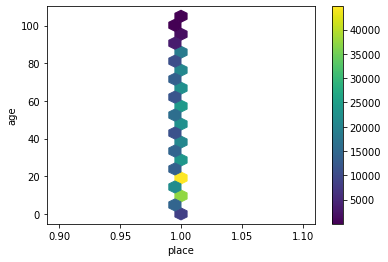

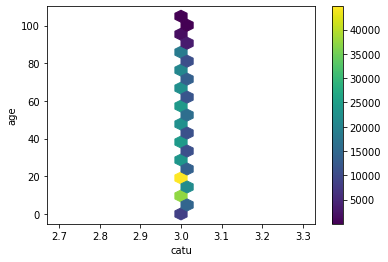

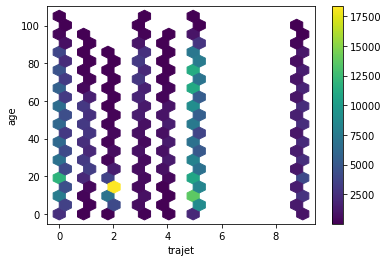

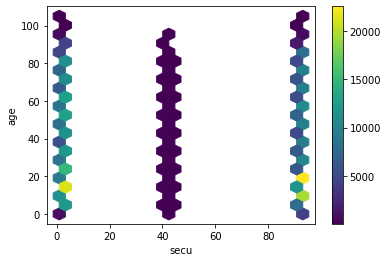

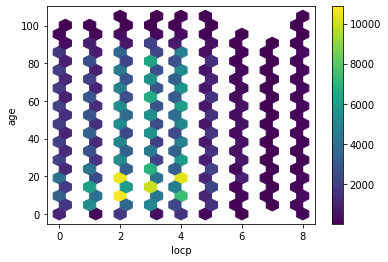

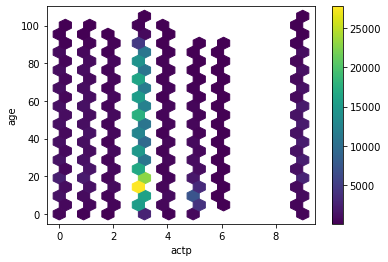

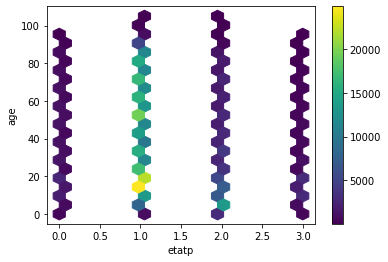

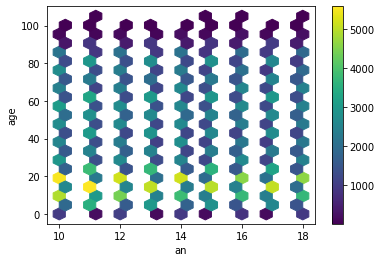

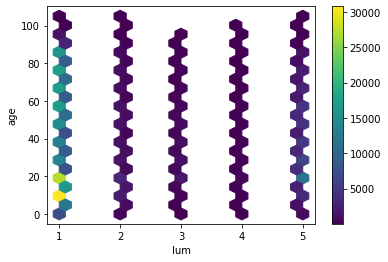

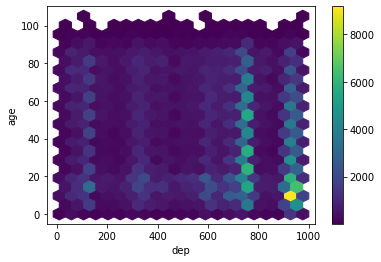

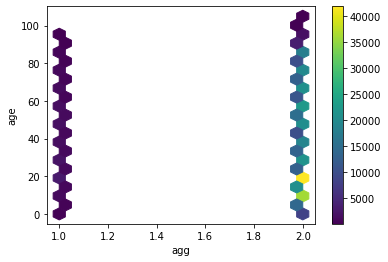

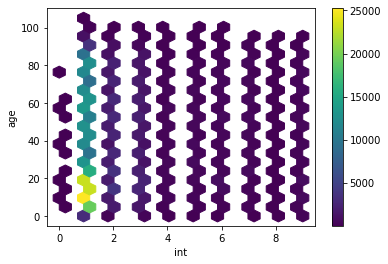

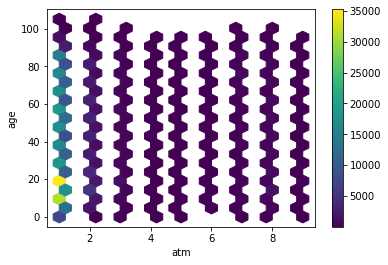

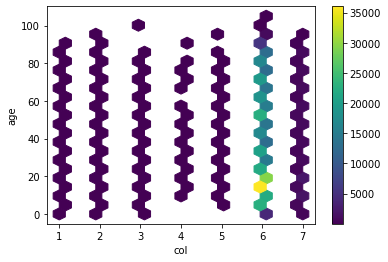

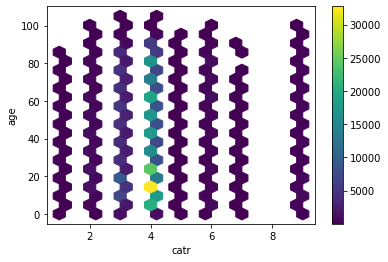

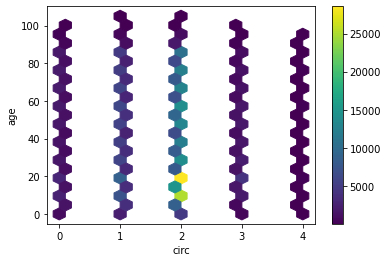

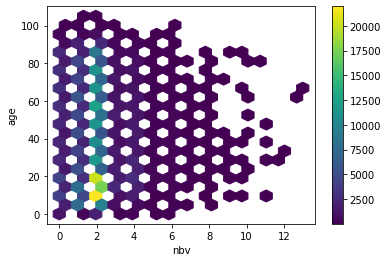

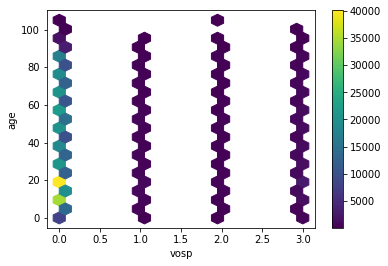

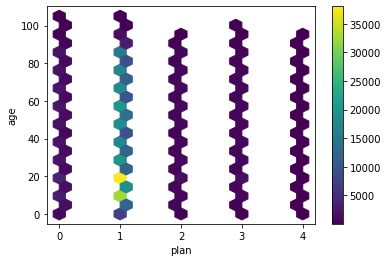

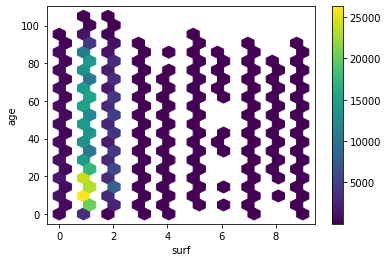

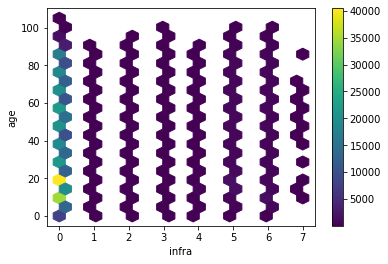

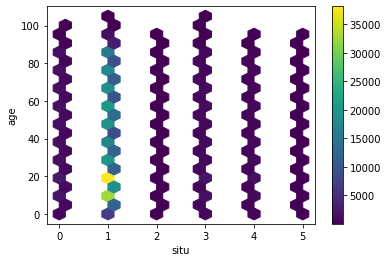

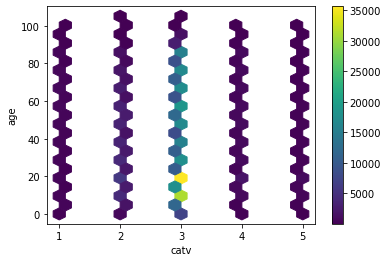

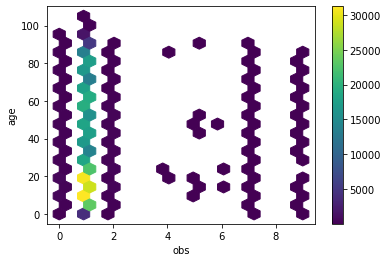

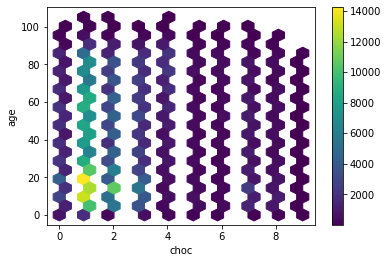

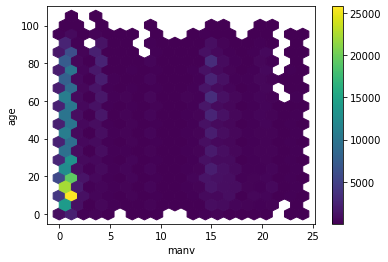

In [0]:
columns = list(df_p_all)

for column in columns:
  if column != 'age' and column != 'grav' and column != 'num_acc':
    ax = df_p_all.plot.hexbin(x=column,
                      y='age',
                      C='grav',
                      reduce_C_function=np.sum,
                      title='Hexagonal bin of age x ' + column,
                      cmap='viridis',
                      gridsize=20,
                      sharex=False)

# Time Analysis

In [0]:
df_time = df.copy()
df_c = pd.read_csv('caracteristiques.csv')
df_c = df_c[['Num_Acc', 'mois', 'jour', 
                 'hrmn']].copy()
df_time = df_time.join(df_c.set_index('Num_Acc'), on='num_acc')
df_time.info()
df_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232233 entries, 0 to 1232232
Data columns (total 33 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   num_acc  1232233 non-null  int64  
 1   num_veh  1232233 non-null  object 
 2   place    1232233 non-null  float64
 3   catu     1232233 non-null  int64  
 4   grav     1232233 non-null  int64  
 5   age      1232233 non-null  float64
 6   trajet   1232233 non-null  float64
 7   secu     1232233 non-null  float64
 8   locp     1232233 non-null  float64
 9   actp     1232233 non-null  float64
 10  etatp    1232233 non-null  float64
 11  an       1232233 non-null  int64  
 12  lum      1232233 non-null  int64  
 13  dep      1232233 non-null  int64  
 14  agg      1232233 non-null  int64  
 15  int      1232233 non-null  int64  
 16  atm      1232233 non-null  float64
 17  col      1232233 non-null  float64
 18  catr     1232233 non-null  int64  
 19  circ     1232233 non-null  float64
 20  nb

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv,mois,jour,hrmn
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0,1,24,1505
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0,1,24,1505
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0,3,4,1135


In [0]:
# First thing we swap 2 and 4 in grav to make more sense
df_time.replace({'grav': {2: -1}})
df_time.replace({'grav': {4: 2}})
df_time.replace({'grav': {-1: 4}})

,num_acc,num_veh,place,catu,grav,age,trajet,secu,locp,actp,etatp,an,lum,dep,agg,int,atm,col,catr,circ,nbv,vosp,plan,surf,infra,situ,catv,obs,choc,manv,mois,jour,hrmn
0,201800000001,B01,1.0,1,3,90.0,0.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,3.0,1.0,1,24,1505
1,201800000001,A01,1.0,1,1,58.0,5.0,11.0,0.0,0.0,0.0,18,1,590,1,4,1.0,1.0,3,2.0,2.0,0.0,3.0,1.0,0.0,1.0,3,2.0,2.0,15.0,1,24,1505
2,201800000002,A01,1.0,1,1,71.0,0.0,11.0,0.0,0.0,0.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
3,201800000002,A01,1.0,3,4,59.0,0.0,2.0,2.0,3.0,1.0,18,1,590,2,7,7.0,7.0,4,2.0,2.0,0.0,2.0,1.0,0.0,1.0,3,1.0,0.0,1.0,2,12,1015
4,201800000003,A01,1.0,1,3,31.0,5.0,21.0,0.0,0.0,0.0,18,1,590,2,3,1.0,7.0,3,2.0,2.0,0.0,1.0,1.0,0.0,1.0,2,2.0,1.0,1.0,3,4,1135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232228,201000069384,A01,1.0,1,4,41.0,9.0,13.0,0.0,0.0,0.0,10,3,974,1,1,1.0,7.0,2,1.0,2.0,0.0,1.0,1.0,0.0,3.0,3,7.0,1.0,1.0,12,29,500
1232229,201000069385,B01,1.0,1,4,29.0,9.0,93.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,21.0,12,30,1805
1232230,201000069385,A01,1.0,1,1,28.0,9.0,11.0,0.0,0.0,0.0,10,2,974,2,1,1.0,3.0,4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,3,2.0,3.0,15.0,12,30,1805
1232231,201000069386,B01,1.0,1,4,14.0,9.0,22.0,0.0,0.0,0.0,10,3,974,2,1,1.0,3.0,4,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1,2.0,1.0,17.0,12,31,2025


In [0]:
df_year = []
for i in range(9):
  df_year.append(df_time[df_time.an == 10 + i])

In [0]:
print("Histogram for years")
print()
print(df['an'].value_counts())
print()

Histogram for years

10    154192
11    148543
12    138628
17    136021
16    133422
14    132186
15    130378
18    130169
13    128694
Name: an, dtype: int64



Year 2018


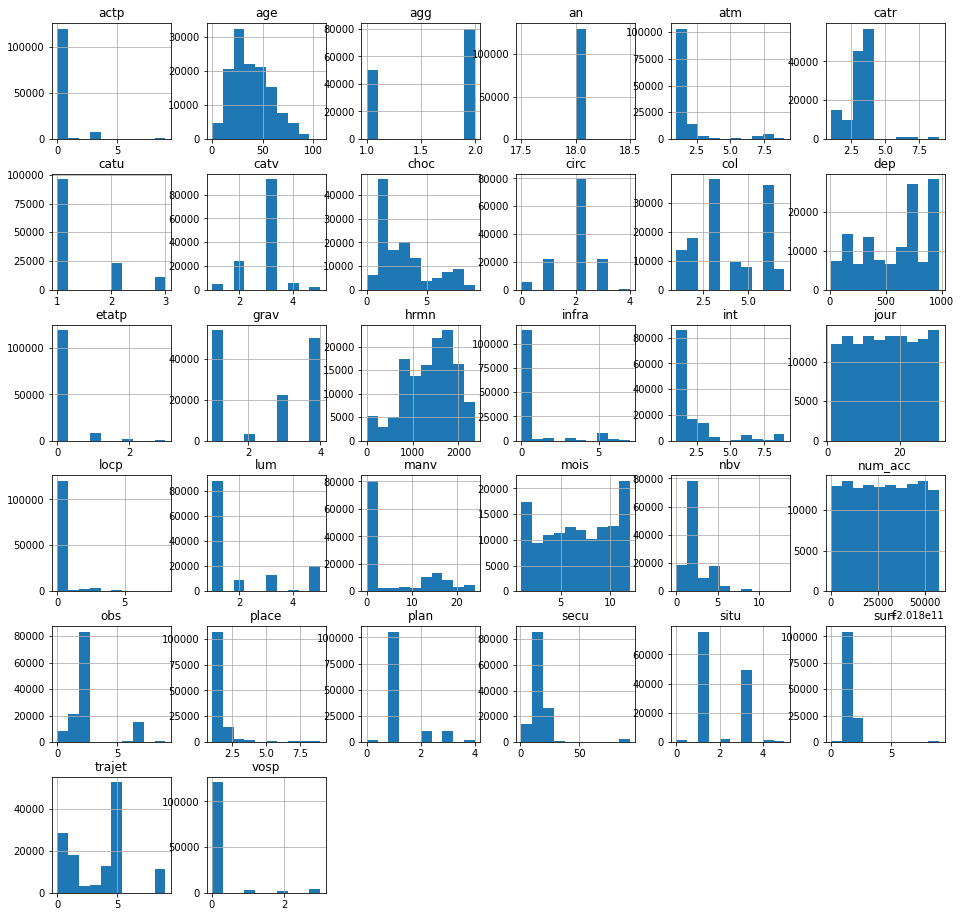

In [0]:
# Choose the year (which should be [year desired] - 2010)
year = 8

print("Year " + str(2010 + year))
hist = df_year[year].hist(figsize=(16,16))

In [0]:
# Transforming our data about dates
df_time['an'] = 2000 + df_time['an']
df_time['min'] = df_time['hrmn'] % 100
df_time['hr'] = df_time['hrmn'] / 100
del df_time['hrmn']

In [0]:
# Renaming the labels to join them together
df_time.rename(columns={'an' : 'year'}, inplace=True)
df_time.rename(columns={'mois' : 'month'}, inplace=True)
df_time.rename(columns={'jour' : 'day'}, inplace=True)
df_time.rename(columns={'hr' : 'hour'}, inplace=True)
df_time.rename(columns={'min' : 'minute'}, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54541d4160>]],
      dtype=object)

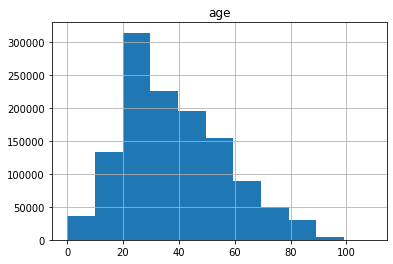

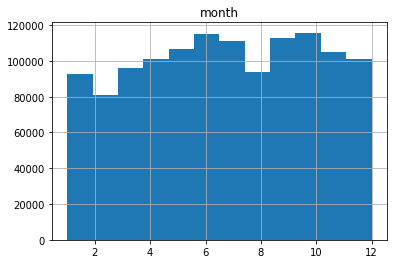

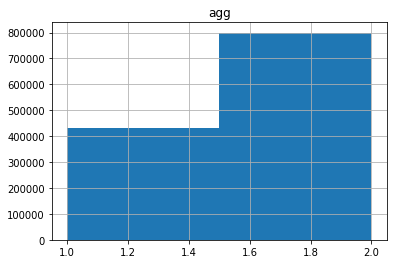

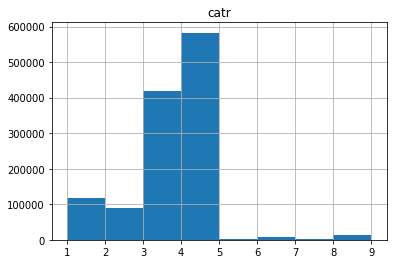

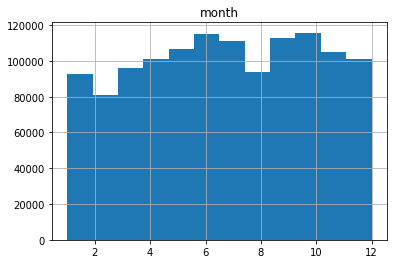

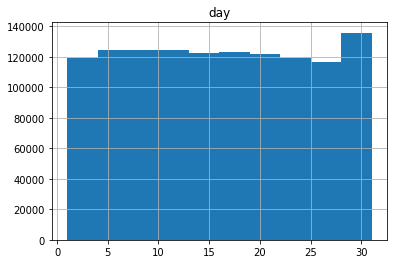

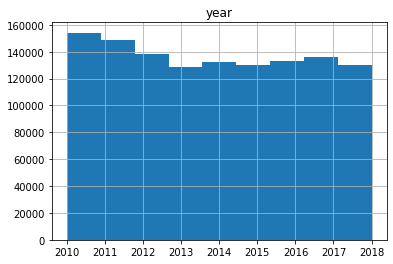

In [0]:
df_time.hist(column='age', bins=11)
df_time.hist(column='month', bins=12)
df_time.hist(column='agg', bins=2)
df_time.hist(column='catr', bins=8)
df_time.hist(column='month', bins=12)
df_time.hist(column='day', bins=10)
df_time.hist(column='year', bins=9)


In [0]:
# Create a label date with all data about the date
df_time['date'] = pd.to_datetime(df_time[['year', 'month', 'day']])
df_time = df_time.set_index('date')

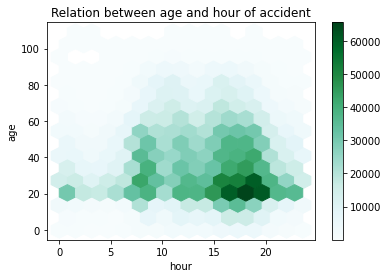

In [0]:
ax = df_time.plot.hexbin(x='hour',
                    y='age',
                     C='grav',
                     title='Relation between age and hour of accident',
                    reduce_C_function=np.sum,
                    gridsize=15,
                    sharex=False)

The conclusion from this graph is that people between 10 and 20 year have bigger risks, mainly near 18h and 7h.

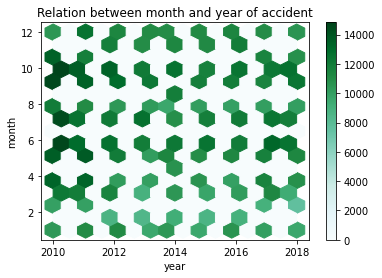

In [0]:
ax = df_time.plot.hexbin(x='year',
                    y='month',
                    reduce_C_function=np.sum,
                    title='Relation between month and year of accident',
                    gridsize=15,
                    sharex=False)

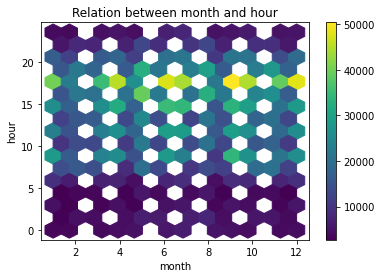

In [0]:
ax = df_time.plot.hexbin(x='month',
                    y='hour',
                    C='grav',
                    reduce_C_function=np.sum,
                    title='Relation between month and hour',
                    gridsize=15,
                    cmap="viridis",
                    sharex=False)

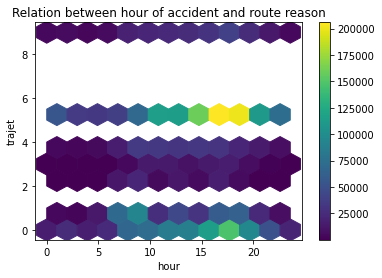

In [0]:
ax = df_time.plot.hexbin(x='hour', y ='trajet', C='grav',
                    reduce_C_function=np.sum,
                    cmap="viridis", 
                    title='Relation between hour of accident and route reason',
                    gridsize=12,
                    sharex=False)

In [0]:
print()
print(df_time['trajet'].value_counts())
print()


5.0    471133
0.0    324453
1.0    168745
4.0    119589
9.0     87166
3.0     33321
2.0     27826
Name: trajet, dtype: int64



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5454409be0>]],
      dtype=object)

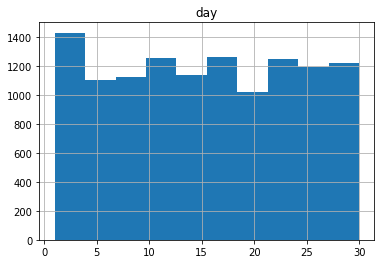

In [0]:
# Analysis of parts of time: End of the year of 2017 for instance:

df_test = df_time.copy()
df_test2 = df_test.loc['2017-11-01' : '2017-12-01']
df_test2.hist(column='day', bins=10)

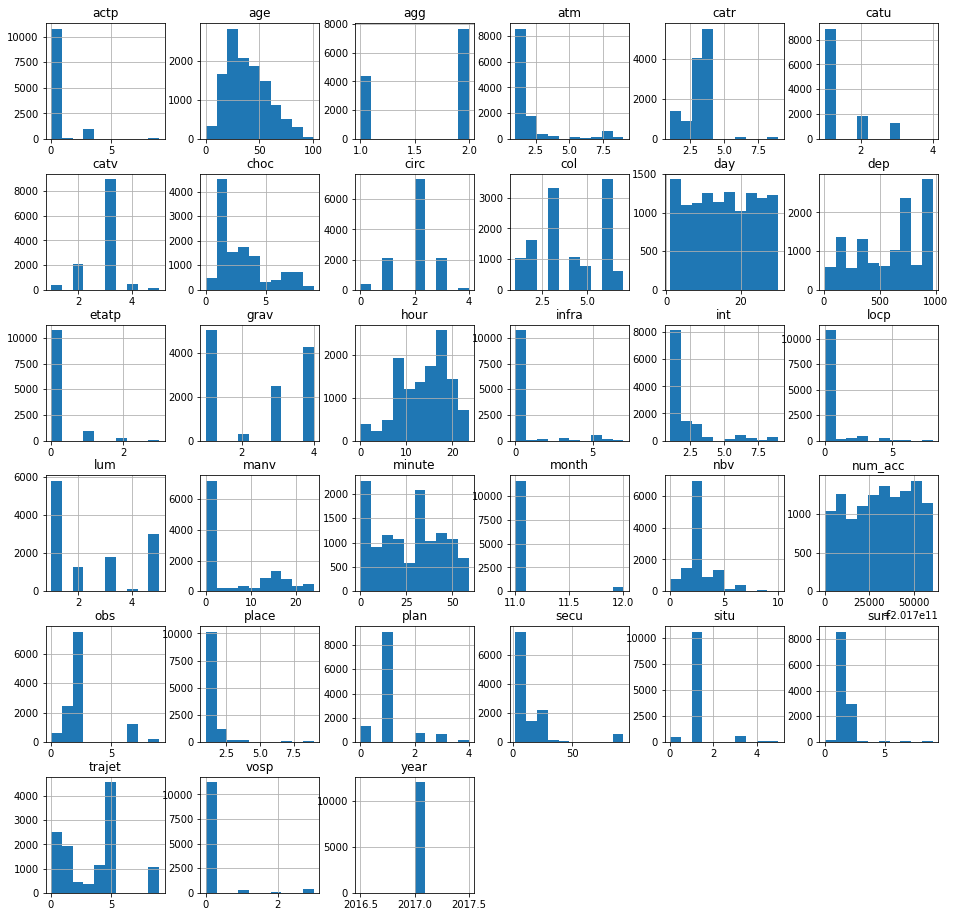

In [0]:
hist = df_test2.hist(figsize=(16,16))

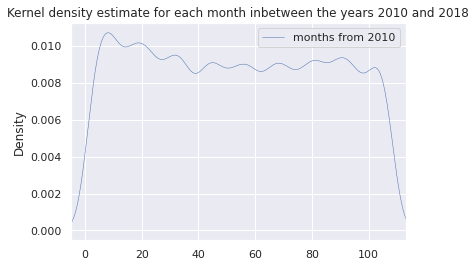

In [0]:
# Graph of accidents through the months between 2010 and 2018:

sns.set(rc={'figure.figsize':(6, 4)})

df_test = df_time.copy()
df_test['reduce_year'] = 2010
df_test['months from 2010'] = (df_test['year'] - df_test['reduce_year']) * 12 + df_test['month']
df_test['months from 2010'].plot(linewidth=0.5, kind='density', title='Kernel density estimate for each month inbetween the years 2010 and 2018'
, sharex=False, xlim = (-5, 113), legend=True, bw_method=0.1)

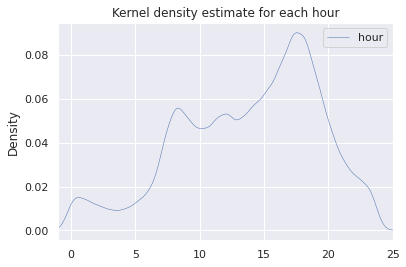

In [0]:
# Now we identity the time where there is more probability of ocurring an accident

df_test['hour'].plot(linewidth=0.5, kind='density', title='Kernel density estimate for each hour', legend=True, xlim=(-1, 25), bw_method=0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f545247b898>]],
      dtype=object)

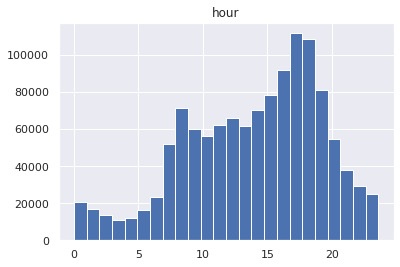

In [0]:
df_time.hist(column='hour', bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5452382940>]],
      dtype=object)

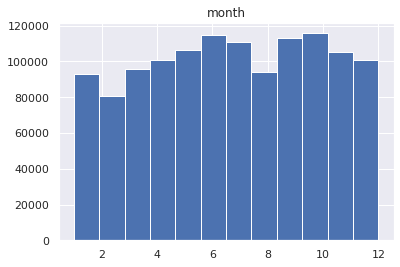

In [0]:
df_time.hist(column='month', bins=12)

In [0]:
print()
print(df_time['month'].value_counts())
print()


10    115777
6     114948
9     113078
7     111143
5     106558
11    105256
12    100999
4     100919
3      95867
8      93966
1      92808
2      80914
Name: month, dtype: int64

